In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/top-2000-companies-financial-data-2024-dataset/Top 2000 Companies Financial Data 2024.csv


In [2]:
csv_file = "/kaggle/input/top-2000-companies-financial-data-2024-dataset/Top 2000 Companies Financial Data 2024.csv"
df = pd.read_csv(csv_file)
df.head()

,Unnamed: 0,Name,Country,Sales,Profit,Assets,Market Value
0,0,JPMorganChase,United States,$252.9 B,$50 B,"$4,090.7 B",$588.1 B
1,1,Berkshire Hathaway,United States,$369 B,$73.4 B,"$1,070 B",$899.1 B
2,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,$489.1 B,$116.9 B,$661.5 B,"$1,919.3 B"
3,3,ICBC,China,$223.8 B,$50.4 B,"$6,586 B",$215.2 B
4,4,Bank of America,United States,$183.3 B,$25 B,"$3,273.8 B",$307.3 B


In [3]:
df.describe()

,Unnamed: 0
count,2001.000000
mean,1000.000000
std,577.783264
min,0.000000
25%,500.000000
50%,1000.000000
75%,1500.000000
max,2000.000000


In [4]:
df.sort_values("Market Value", ascending=False).head(10)

,Unnamed: 0,Name,Country,Sales,Profit,Assets,Market Value
34,34,UBS,Switzerland,$81.3 B,$28.9 B,"$1,607.1 B",$97.4 B
364,364,Freddie Mac,United States,$110.5 B,$11.3 B,"$3,287.4 B",$962 M
275,275,ABB,Switzerland,$32.3 B,$3.6 B,$41.1 B,$96.7 B
573,573,SK Hynix,South Korea,$30.4 B,$-3.5 B,$76.7 B,$96.5 B
94,94,Cigna,United States,$204.1 B,$3.6 B,$148.4 B,$96.2 B
198,198,Mondelez International,United States,$36.1 B,$4.3 B,$77.6 B,$95.5 B
141,141,ICICI Bank,India,$28.5 B,$5.3 B,$283.5 B,$95.3 B
328,328,Richemont,Switzerland,$22.4 B,$2.6 B,$46.1 B,$94.4 B
1540,1540,Shengjing Bank,China,$5.7 B,$105.8 M,$152.3 B,$936 M
1670,1670,BayWa,Germany,$24.8 B,$-106.1 M,$14.3 B,$932 M


In [5]:
df.dtypes

Unnamed: 0       int64
Name            object
Country         object
Sales           object
Profit          object
Assets          object
Market Value    object
dtype: object

In [6]:
columns_to_clean = ['Sales', 'Profit', 'Assets', 'Market Value']

# Function to clean and convert to numeric
def clean_numeric_column(column):
    def convert_value(value):
        if 'B' in value:  # If value is in billions
            return float(value.replace('$', '').replace('B', '').replace(',', '')) * 1e9
        elif 'M' in value:  # If value is in millions
            return float(value.replace('$', '').replace('M', '').replace(',', '')) * 1e6
        else:  # If no suffix, just clean and convert
            return float(value.replace('$', '').replace(',', ''))
    
    return column.apply(convert_value)

for col in columns_to_clean:
    df[col] = clean_numeric_column(df[col])

print(df.dtypes)
print(df.head())

Unnamed: 0        int64
Name             object
Country          object
Sales           float64
Profit          float64
Assets          float64
Market Value    float64
dtype: object
   Unnamed: 0                                      Name        Country  \
0           0                             JPMorganChase  United States   
1           1                        Berkshire Hathaway  United States   
2           2  Saudi Arabian Oil Company (Saudi Aramco)   Saudi Arabia   
3           3                                      ICBC          China   
4           4                           Bank of America  United States   

          Sales        Profit        Assets  Market Value  
0  2.529000e+11  5.000000e+10  4.090700e+12  5.881000e+11  
1  3.690000e+11  7.340000e+10  1.070000e+12  8.991000e+11  
2  4.891000e+11  1.169000e+11  6.615000e+11  1.919300e+12  
3  2.238000e+11  5.040000e+10  6.586000e+12  2.152000e+11  
4  1.833000e+11  2.500000e+10  3.273800e+12  3.073000e+11  


# Descriptive Analysis

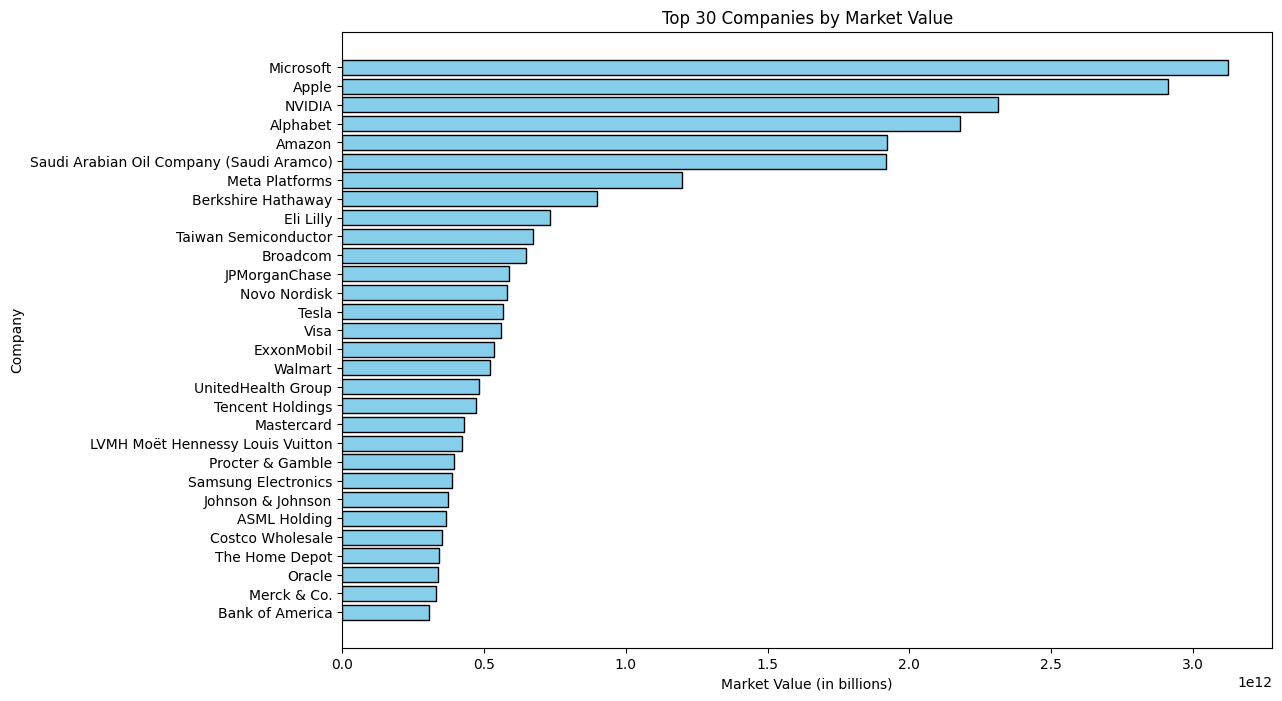

In [7]:
import matplotlib.pyplot as plt

top_market_value = df.sort_values("Market Value", ascending=False).head(30)

plt.figure(figsize=(12, 8))
plt.barh(top_market_value['Name'], top_market_value['Market Value'], color='skyblue', edgecolor='black')
plt.xlabel('Market Value (in billions)')
plt.ylabel('Company')
plt.title('Top 30 Companies by Market Value')
plt.gca().invert_yaxis()
plt.show()

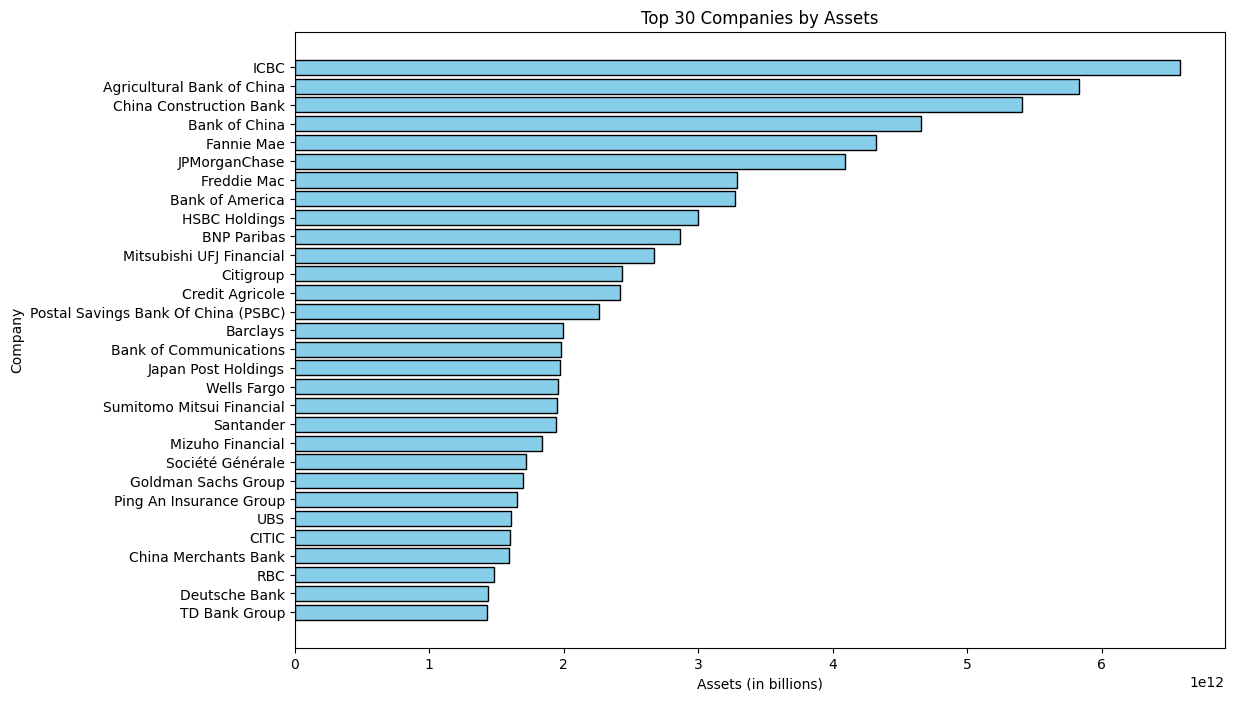

In [8]:
top_assets = df.sort_values("Assets", ascending=False).head(30)

plt.figure(figsize=(12, 8))
plt.barh(top_assets['Name'], top_assets['Assets'], color='skyblue', edgecolor='black')
plt.xlabel('Assets (in billions)')
plt.ylabel('Company')
plt.title('Top 30 Companies by Assets')
plt.gca().invert_yaxis()
plt.show()

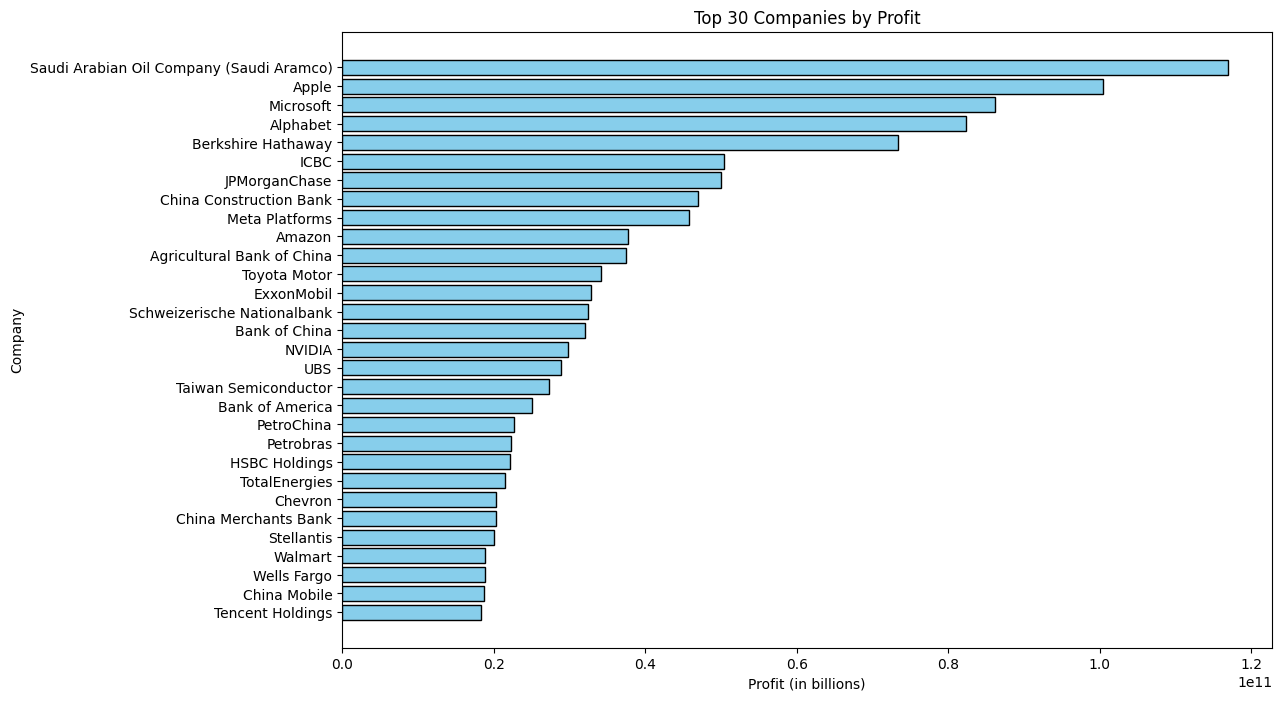

In [9]:
top_profit = df.sort_values("Profit", ascending=False).head(30)

plt.figure(figsize=(12, 8))
plt.barh(top_profit['Name'], top_profit['Profit'], color='skyblue', edgecolor='black')
plt.xlabel('Profit (in billions)')
plt.ylabel('Company')
plt.title('Top 30 Companies by Profit')
plt.gca().invert_yaxis()
plt.show()

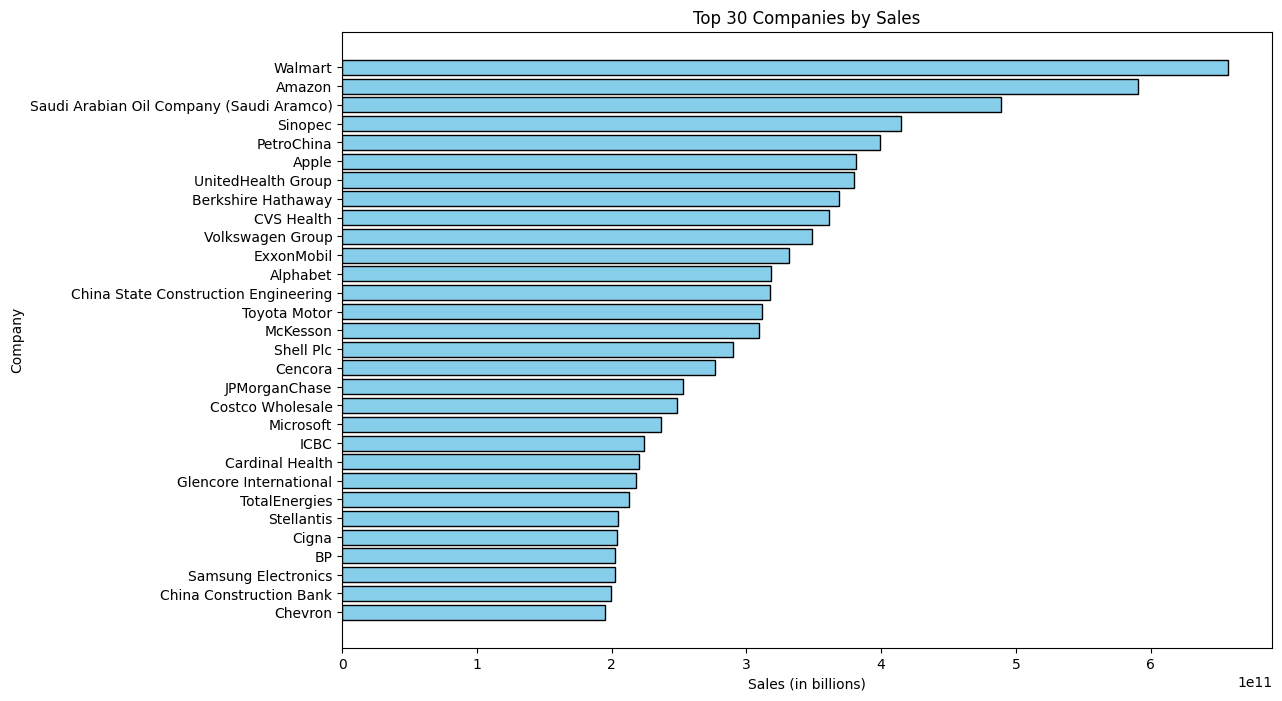

In [10]:
top_sales = df.sort_values("Sales", ascending=False).head(30)

plt.figure(figsize=(12, 8))
plt.barh(top_sales['Name'], top_sales['Sales'], color='skyblue', edgecolor='black')
plt.xlabel('Sales (in billions)')
plt.ylabel('Company')
plt.title('Top 30 Companies by Sales')
plt.gca().invert_yaxis()
plt.show()

In [11]:
top_countries = df['Country'].value_counts()
top_countries.head(10)

Country
United States     621
China             280
Japan             181
India              71
United Kingdom     66
South Korea        61
Canada             59
Germany            50
France             49
Switzerland        46
Name: count, dtype: int64

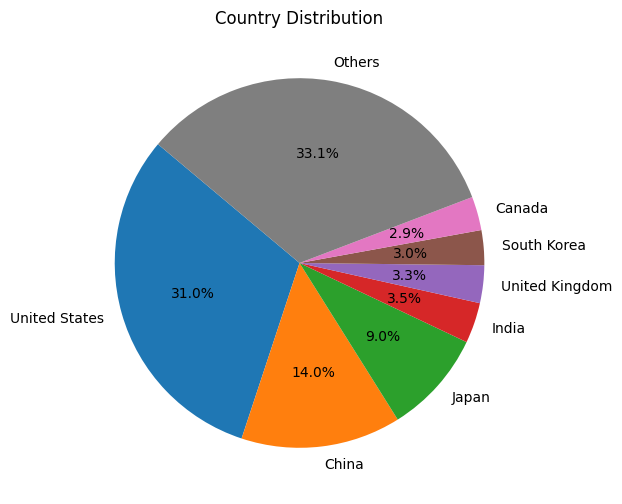

In [12]:
threshold = 0.025
total_count = top_countries.sum()

top_countries_with_others = top_countries[top_countries / total_count > threshold]
others_count = total_count - top_countries_with_others.sum()
top_countries_with_others['Others'] = others_count

plt.figure(figsize=(6, 6))
plt.pie(
    top_countries_with_others, 
    labels=top_countries_with_others.index, 
    autopct='%1.1f%%', 
    startangle=140
)
plt.title("Country Distribution")
plt.show()

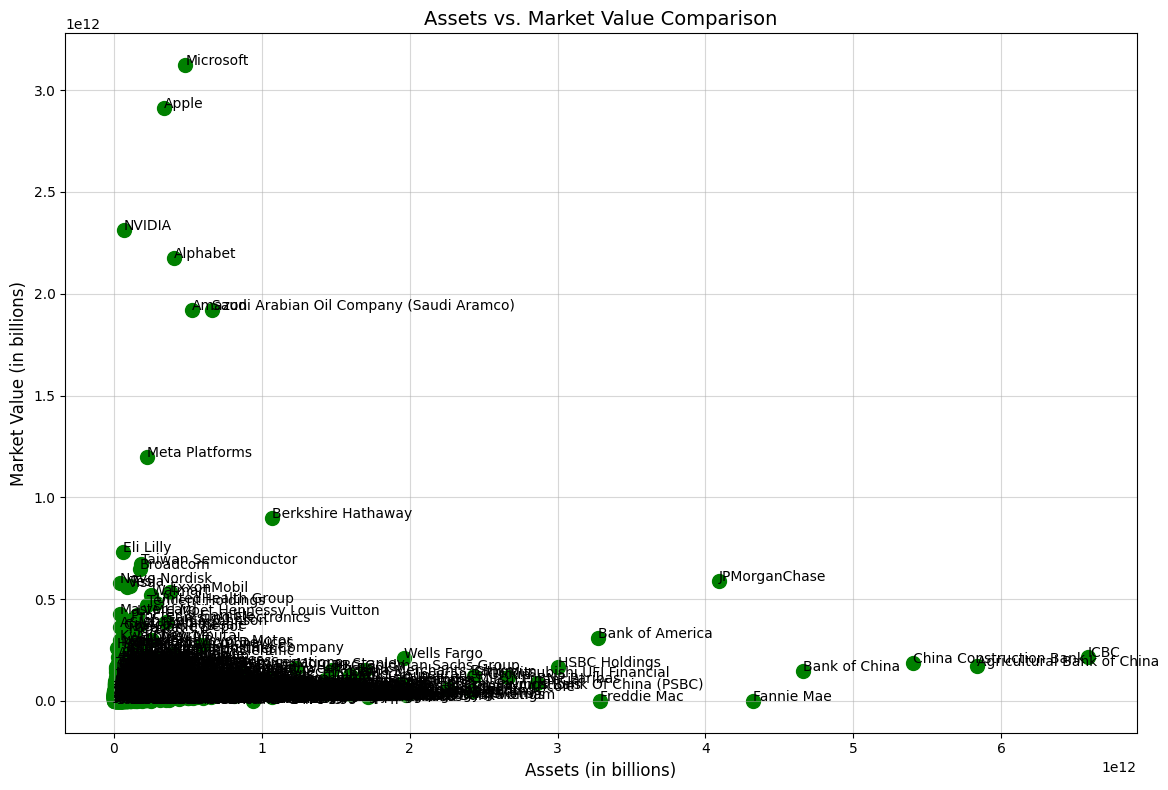

In [13]:
# The relationship between a company's assets and its valuation.
plt.figure(figsize=(12, 8))
plt.scatter(df['Assets'], df['Market Value'], color='green', s=100)
for i, txt in enumerate(df['Name']):
    plt.annotate(txt, (df['Assets'][i], df['Market Value'][i]), fontsize=10)
plt.xlabel('Assets (in billions)', fontsize=12)
plt.ylabel('Market Value (in billions)', fontsize=12)
plt.title('Assets vs. Market Value Comparison', fontsize=14)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

# Profitability Analysis

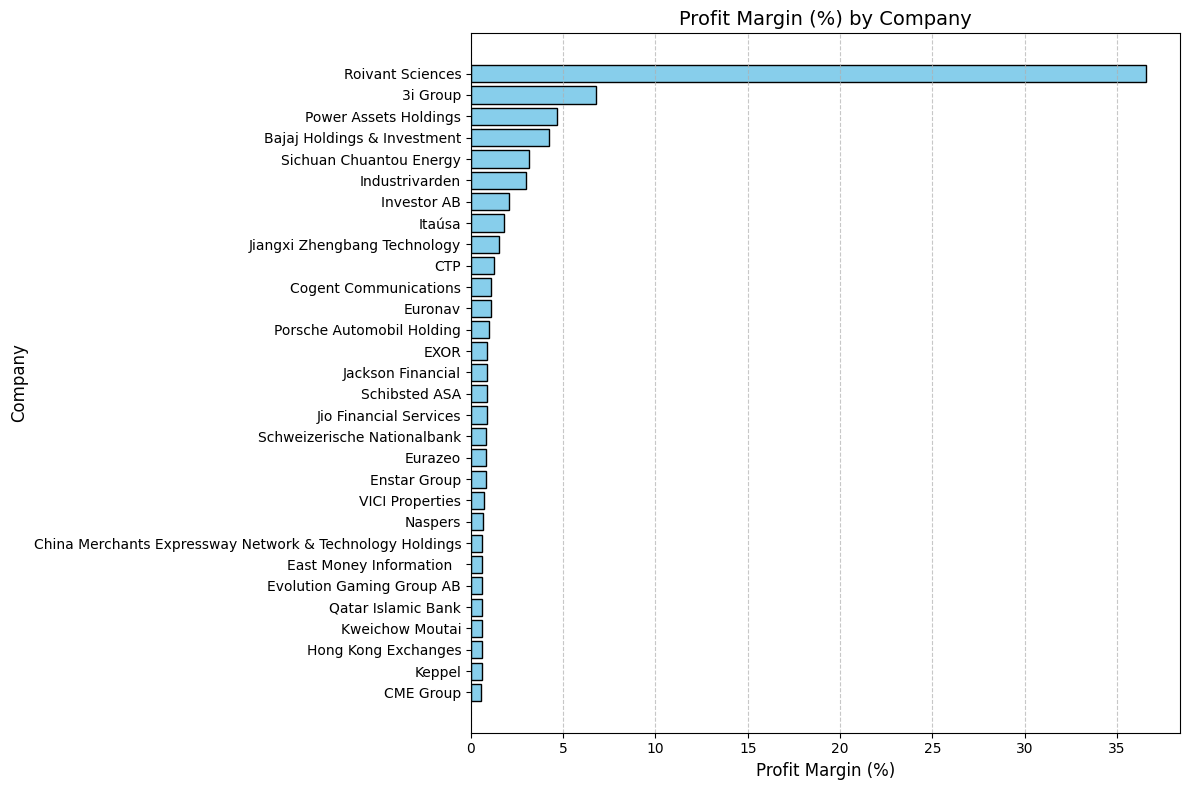

In [14]:
df["Profit Margin, %"] = df["Profit"]/df["Sales"]
top_profit_margin_30 = df.sort_values("Profit Margin, %", ascending=False).head(30)

plt.figure(figsize=(12, 8))
plt.barh(top_profit_margin_30['Name'], top_profit_margin_30['Profit Margin, %'], color='skyblue', edgecolor='black')
plt.xlabel('Profit Margin (%)', fontsize=12)
plt.ylabel('Company', fontsize=12)
plt.title('Profit Margin (%) by Company', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


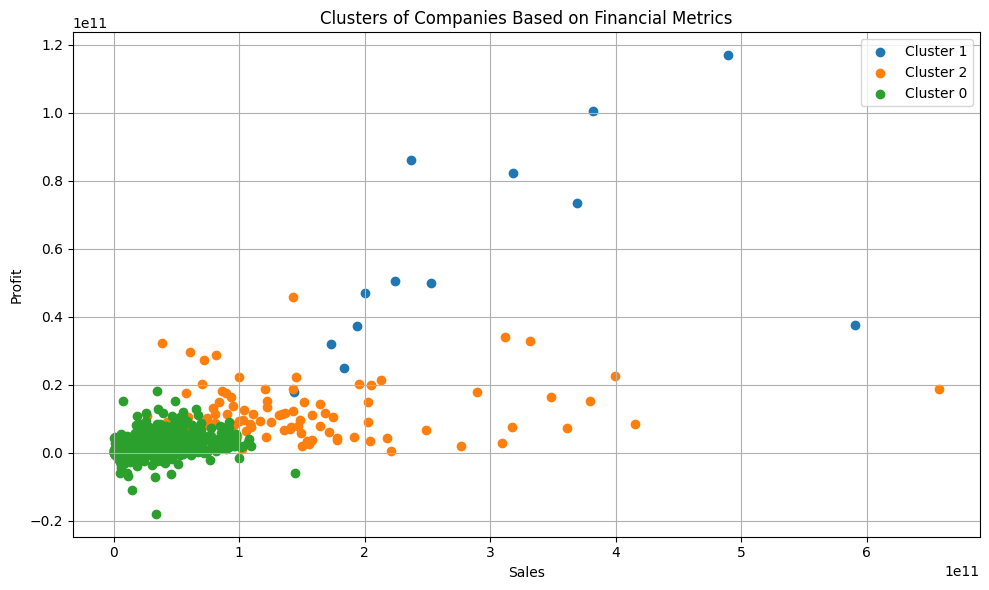

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
financial_data_scaled = scaler.fit_transform(df[['Sales', 'Profit', 'Assets']])

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(financial_data_scaled)

plt.figure(figsize=(10, 6))
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Sales'], cluster_data['Profit'], label=f'Cluster {cluster}')

plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Clusters of Companies Based on Financial Metrics')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()